### Logistic Regression

In [47]:
#importing the required libraries
import sklearn
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [48]:
# loading the iris dataset
iris=load_iris()
X=iris['data']
y=iris['target']

In [49]:
# shape of y
y.shape

(150,)

In [50]:
# three target classes are there in the iris dataset and they are labelled as 0,1 and 2
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [51]:
### Preprocess the Data
scaler=StandardScaler()
X=scaler.fit_transform(X)
X=torch.tensor(X,dtype=torch.float32)
y=torch.tensor(y,dtype=torch.float32)


In [52]:
X

tensor([[-9.0068e-01,  1.0190e+00, -1.3402e+00, -1.3154e+00],
        [-1.1430e+00, -1.3198e-01, -1.3402e+00, -1.3154e+00],
        [-1.3854e+00,  3.2841e-01, -1.3971e+00, -1.3154e+00],
        [-1.5065e+00,  9.8217e-02, -1.2834e+00, -1.3154e+00],
        [-1.0218e+00,  1.2492e+00, -1.3402e+00, -1.3154e+00],
        [-5.3718e-01,  1.9398e+00, -1.1697e+00, -1.0522e+00],
        [-1.5065e+00,  7.8881e-01, -1.3402e+00, -1.1838e+00],
        [-1.0218e+00,  7.8881e-01, -1.2834e+00, -1.3154e+00],
        [-1.7489e+00, -3.6218e-01, -1.3402e+00, -1.3154e+00],
        [-1.1430e+00,  9.8217e-02, -1.2834e+00, -1.4471e+00],
        [-5.3718e-01,  1.4794e+00, -1.2834e+00, -1.3154e+00],
        [-1.2642e+00,  7.8881e-01, -1.2266e+00, -1.3154e+00],
        [-1.2642e+00, -1.3198e-01, -1.3402e+00, -1.4471e+00],
        [-1.8700e+00, -1.3198e-01, -1.5107e+00, -1.4471e+00],
        [-5.2506e-02,  2.1700e+00, -1.4539e+00, -1.3154e+00],
        [-1.7367e-01,  3.0908e+00, -1.2834e+00, -1.0522e+00],
        

In [53]:
# splitting the data into training and testing set 
# ratio of training and testing data = 8:2
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=32)

In [54]:
X_train.shape

torch.Size([120, 4])

In [55]:
y_train.shape

torch.Size([120])

In [56]:
X_test.shape

torch.Size([30, 4])

In [57]:
# definning the logistic regression class and setting the constructor
class LogisticRegression(nn.Module):
  def __init__(self,n_features,h1):
    # calling the constructor of the parents class
    super(LogisticRegression,self).__init__()
    # intializing the shape of the layer1 layer2
    self.layer1=nn.Linear(n_features,h1)
    self.layer2=nn.Linear(h1,3)
    # definning the softmax function 
    self.softmax=nn.Softmax(dim=1)

  # function for feedforward pass
  def forward(self,x):
    # using the Relu activation function as the activation function in the layer 1 and layer 2
    out=F.relu(self.layer1(x))
    out=F.relu(self.layer2(out))
    # using the softmax function as the activation function in the output layer
    out=self.softmax(out)
    return out

In [58]:

def train(model,X,y,epocs=50,optimizer=None,loss_fn=None,bsz=20,seed=20):
  torch.manual_seed(seed)
  cost=[]
  for epoch in range(epocs):
    # shuffling the indices
    suffle_idx=torch.randperm(y.size(0))
    batches =torch.split(suffle_idx,bsz)
    for batch_idx in batches:
      # 1. Compute the output
      yhat=model(X[batch_idx])

      # 2. Compute the error
    
      loss=loss_fn(yhat,y[batch_idx].long())

      # 3. Compute the Gradient
      optimizer.zero_grad()
      loss.backward()

      # 4. Update the Parameters
      optimizer.step()

      # Log the loss
    with torch.no_grad():
      yhat=model(X)
      curr_loss=loss_fn(yhat,y.long())
      print('Epoc:%3d ' % epoch,end="")
      print('BCE %.2f' % curr_loss)
      cost.append(curr_loss)
  return cost





In [59]:
model=LogisticRegression(n_features=X_train.size(1),h1=20)
optimizer=torch.optim.Adam(model.parameters(),lr=.001)
loss_fn = nn.CrossEntropyLoss()

In [60]:
cost =train(model,X_train,y_train,optimizer=optimizer,loss_fn=loss_fn)

Epoc:  0 BCE 1.09
Epoc:  1 BCE 1.08
Epoc:  2 BCE 1.07
Epoc:  3 BCE 1.07
Epoc:  4 BCE 1.06
Epoc:  5 BCE 1.05
Epoc:  6 BCE 1.05
Epoc:  7 BCE 1.04
Epoc:  8 BCE 1.03
Epoc:  9 BCE 1.02
Epoc: 10 BCE 1.02
Epoc: 11 BCE 1.01
Epoc: 12 BCE 1.00
Epoc: 13 BCE 1.00
Epoc: 14 BCE 0.99
Epoc: 15 BCE 0.99
Epoc: 16 BCE 0.98
Epoc: 17 BCE 0.98
Epoc: 18 BCE 0.97
Epoc: 19 BCE 0.97
Epoc: 20 BCE 0.96
Epoc: 21 BCE 0.96
Epoc: 22 BCE 0.96
Epoc: 23 BCE 0.95
Epoc: 24 BCE 0.95
Epoc: 25 BCE 0.95
Epoc: 26 BCE 0.95
Epoc: 27 BCE 0.95
Epoc: 28 BCE 0.94
Epoc: 29 BCE 0.94
Epoc: 30 BCE 0.94
Epoc: 31 BCE 0.94
Epoc: 32 BCE 0.94
Epoc: 33 BCE 0.94
Epoc: 34 BCE 0.94
Epoc: 35 BCE 0.94
Epoc: 36 BCE 0.94
Epoc: 37 BCE 0.94
Epoc: 38 BCE 0.94
Epoc: 39 BCE 0.94
Epoc: 40 BCE 0.93
Epoc: 41 BCE 0.93
Epoc: 42 BCE 0.93
Epoc: 43 BCE 0.93
Epoc: 44 BCE 0.93
Epoc: 45 BCE 0.93
Epoc: 46 BCE 0.93
Epoc: 47 BCE 0.93
Epoc: 48 BCE 0.93
Epoc: 49 BCE 0.93


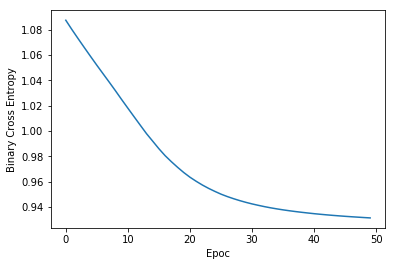

In [61]:
import matplotlib.pyplot as plt
plt.plot(range(len(cost)),cost)
plt.ylabel('Binary Cross Entropy')
plt.xlabel('Epoc')
plt.show()

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
with torch.no_grad():
  train_pred=model(X_train)
  #train_pred
  train_acc=(torch.argmax(train_pred,dim=1)==y_train).float().mean()
  print('Training Accuracy: %.2f' %train_acc)
  test_pred=model(X_test)
  test_acc=(torch.argmax(test_pred,dim=1)==y_test).float().mean()
  print('Testing Accuracy: %.2f' %test_acc)

Training Accuracy: 0.32
Testing Accuracy: 0.40


### Multinomial Logistic Regression

In [64]:
import torch
import torchvision
import torchvision.transforms as transforms

In [65]:
from matplotlib.transforms import Transform
transform=transforms.ToTensor()

### Data Loading
traindata=torchvision.datasets.MNIST(root='./data',train=True,download=True,transform=transform)
trainloader=torch.utils.data.DataLoader(traindata,batch_size=32,shuffle=False)

testdata=torchvision.datasets.MNIST(root='./data',train=False,download=True,transform=transform)
testloader=torch.utils.data.DataLoader(testdata,batch_size=32,shuffle=False)


In [66]:
import matplotlib.pyplot as plt
import numpy as np
def imshow(img):
  img=img.numpy()
  img=np.transpose(img,(1,2,0))
  plt.imshow(img)
  plt.show()


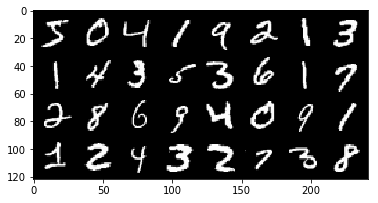

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8])


In [67]:
dataiter=iter(trainloader)
images,labels=dataiter.next()
imshow(torchvision.utils.make_grid(images))
print(labels)

In [68]:
images.view(images.size(0),-1).shape

torch.Size([32, 784])

In [69]:
print(images[0].shape)

torch.Size([1, 28, 28])


In [70]:
import torch.nn as nn
import torch.nn.functional as F
class LogisticNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(1*28*28,100)
    self.layer2=nn.Linear(100,30)
    self.layer3=nn.Linear(30,10)
    
  def forward(self,x):
    x=F.relu(self.layer1(x))
    x=F.relu(self.layer2(x))
    x=self.layer3(x)
    return x



model=LogisticNet()

In [71]:
model

LogisticNet(
  (layer1): Linear(in_features=784, out_features=100, bias=True)
  (layer2): Linear(in_features=100, out_features=30, bias=True)
  (layer3): Linear(in_features=30, out_features=10, bias=True)
)

In [72]:
import torch.optim as optim

In [73]:

def train_mnst(model,train_loader,test_loader,EPOCHS=100,lr=.001,seed=32):
  torch.manual_seed(seed)
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  cost=[]
  model.to(device)
  optimizer=optim.SGD(model.parameters(),lr=lr)
  loss_function=nn.CrossEntropyLoss()
  for epoch in range(EPOCHS):

    curr_loss=0.0
    currect=0.0
    t_currect=0.0
    for i,data in enumerate(train_loader,0):


      ## Get a Batch of Data
      input,target=data[0].to(device),data[1].to(device)
      ###1. Compute the output
     
      ###Flatten the input
      input=input.view(input.size(0),-1)
      yhat=model(input)
      
      ###2. Compute the loss
      loss=loss_function(yhat,target)
      

      ###3. Compute the gradient

      optimizer.zero_grad()
      loss.backward()
    
      ###4. Update the parameters

      optimizer.step()
      ### Log the record
      with torch.no_grad():
        yhat=model(input)
        err=loss_function(yhat,target)
        curr_loss+=err
        b_currect=((torch.argmax(yhat,dim=1)==target).sum()).float()
      
        currect+=b_currect
    ### Calculate the accuracy    
    with torch.no_grad():
      for data in test_loader:
          ims,lbs=data[0].to(device),data[1].to(device)
          pred=model(ims.view(ims.size(0),-1))
          t_currect+=(torch.argmax(pred,dim=1)==lbs).sum()
   
      print('Current Epoch: %3d' %(epoch+1),end="")
      print(' | Loss: %5.2f' %curr_loss,end="")
      accuracy=currect.sum()/len(traindata)*100
      test_accuracy=t_currect.sum()/len(testdata)*100
      #print(currect)
      print(' | Accuracy: %.2f' %accuracy,end="")
      print(' | Test Accuracy: %.2f' %test_accuracy )
  return cost
      

      


In [74]:
cost=train_mnst(model,trainloader,testloader,EPOCHS=30)

Current Epoch:   1 | Loss: 4288.17 | Accuracy: 13.47 | Test Accuracy: 23.63
Current Epoch:   2 | Loss: 4166.08 | Accuracy: 37.64 | Test Accuracy: 46.45
Current Epoch:   3 | Loss: 3860.27 | Accuracy: 49.73 | Test Accuracy: 52.67
Current Epoch:   4 | Loss: 3214.69 | Accuracy: 55.93 | Test Accuracy: 62.43
Current Epoch:   5 | Loss: 2358.90 | Accuracy: 69.39 | Test Accuracy: 75.31
Current Epoch:   6 | Loss: 1717.36 | Accuracy: 77.64 | Test Accuracy: 79.94
Current Epoch:   7 | Loss: 1356.40 | Accuracy: 81.17 | Test Accuracy: 82.78
Current Epoch:   8 | Loss: 1149.39 | Accuracy: 83.42 | Test Accuracy: 84.83
Current Epoch:   9 | Loss: 1019.19 | Accuracy: 85.16 | Test Accuracy: 86.17
Current Epoch:  10 | Loss: 929.57 | Accuracy: 86.43 | Test Accuracy: 87.25
Current Epoch:  11 | Loss: 863.93 | Accuracy: 87.34 | Test Accuracy: 88.02
Current Epoch:  12 | Loss: 814.01 | Accuracy: 88.02 | Test Accuracy: 88.47
Current Epoch:  13 | Loss: 775.01 | Accuracy: 88.54 | Test Accuracy: 88.86
Current Epoch:  

In [75]:
len(traindata)

60000

In [76]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
prob=model(images.view(32,-1).to(device))
(torch.argmax(prob,dim=1).to('cpu')==labels).sum().float()/32*100

tensor(93.7500)